In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

import matplotlib.cm as cm
    
import sys  
sys.path.insert(0, '../src/')

from astropy.table import Table

from jsm_routines import accretion_mass, surviving_mass, accretion_surviving_mass, SHMF
import os
import warnings; warnings.simplefilter('ignore')

In [2]:
acc_data = np.load("../../data/12_4_0/numpy/acc_mass.npy")

surv_data = np.load("../../data/12_4_0/numpy/surv_mass.npy")

as_data = np.load("../../data/12_4_0/numpy/acc_surv_mass.npy")

mass_lim = -4

In [3]:
M = 1e12

m = np.linspace(1e8,1e12,100) # just for the model

psi = m/M

$\frac{dN}{d\ln \psi} = \gamma (a\psi)^{\alpha} \exp{\left[−\beta (a\psi)^{\omega}\right]}$

In [4]:
def unevolved(psi):
    
    gamma = 0.22
    alpha = -0.91
    beta = 6
    omega = 3
    a = 1
    
    return (gamma * psi**(alpha)) * np.exp(-beta*(psi**omega))

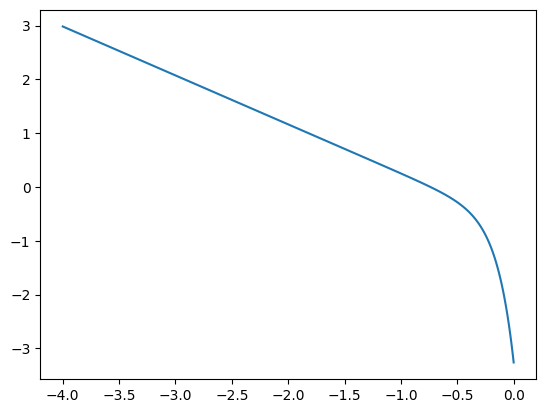

In [5]:
plt.plot(np.log10(psi), np.log10(unevolved(psi)), label="model")
plt.show()

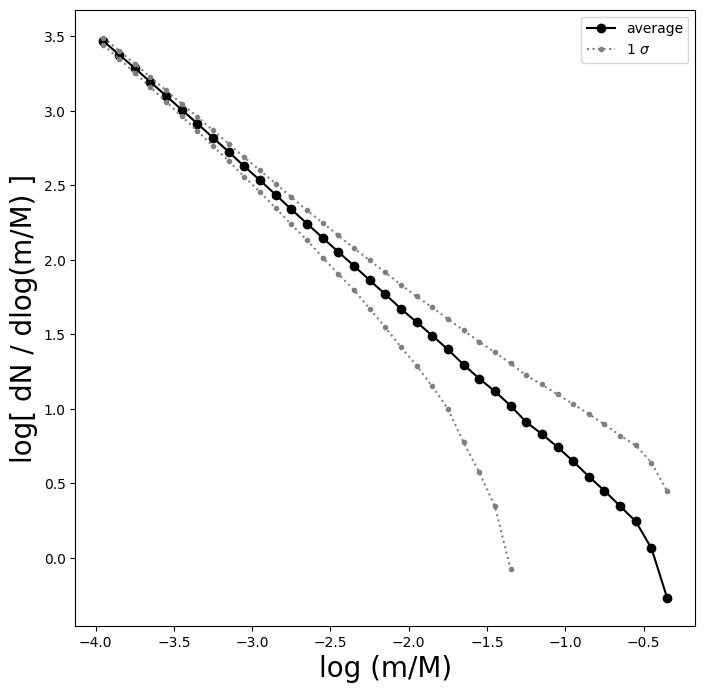

In [6]:
acc_bins, acc_SHMF_ave, acc_SHMF_std = SHMF(acc_data, mass_min=mass_lim)

acc_SHMF = np.array([acc_bins, acc_SHMF_ave, acc_SHMF_std])

#np.save("../../data/12_4_0/numpy/acc_SHMF.npy", acc_SHMF)

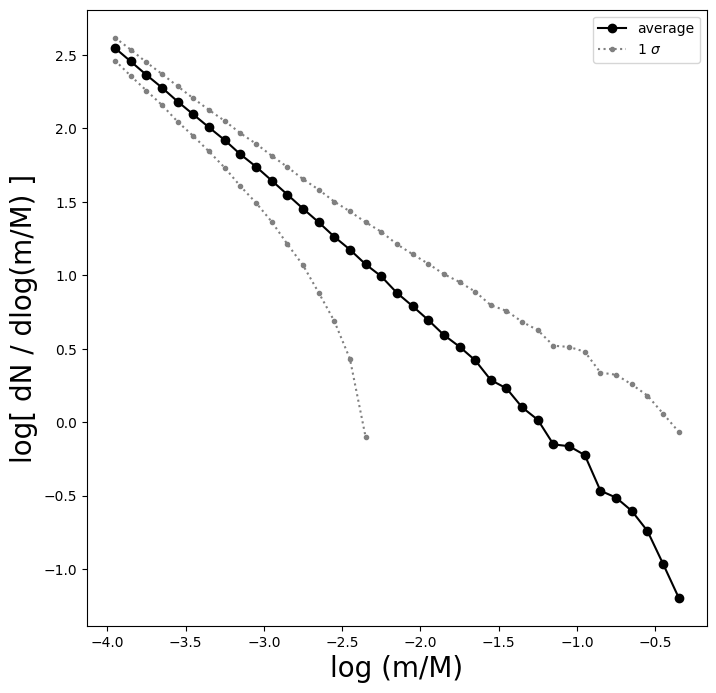

In [7]:
surv_bins, surv_SHMF_ave, surv_SHMF_std = SHMF(surv_data, mass_min=mass_lim)

surv_SHMF = np.array([surv_bins, surv_SHMF_ave, surv_SHMF_std])

#np.save("../../data/12_4_0/numpy/surv_SHMF.npy", surv_SHMF)

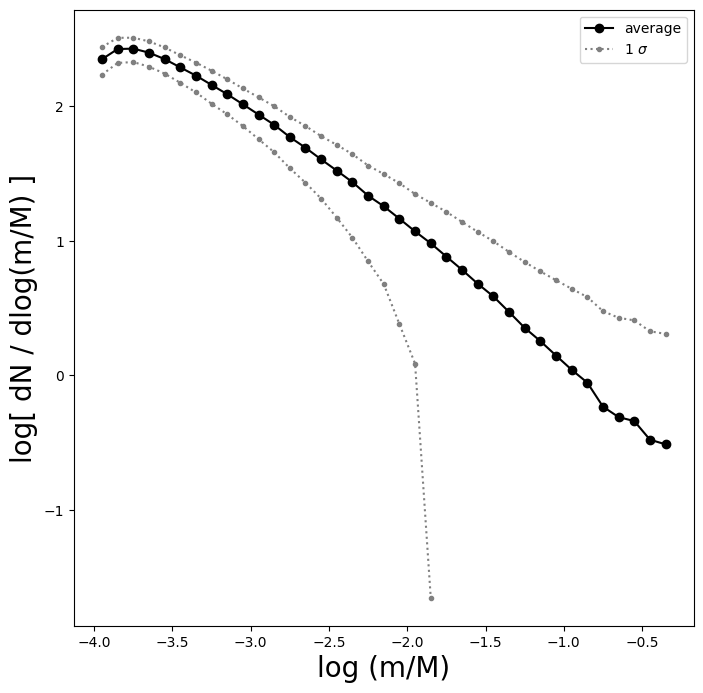

In [8]:
as_bins, as_SHMF_ave, as_SHMF_std = SHMF(as_data, mass_min=mass_lim)

as_SHMF = np.array([as_bins, as_SHMF_ave, as_SHMF_std])

#np.save("../../data/12_4_0/numpy/acc_surv_SHMF", as_SHMF)

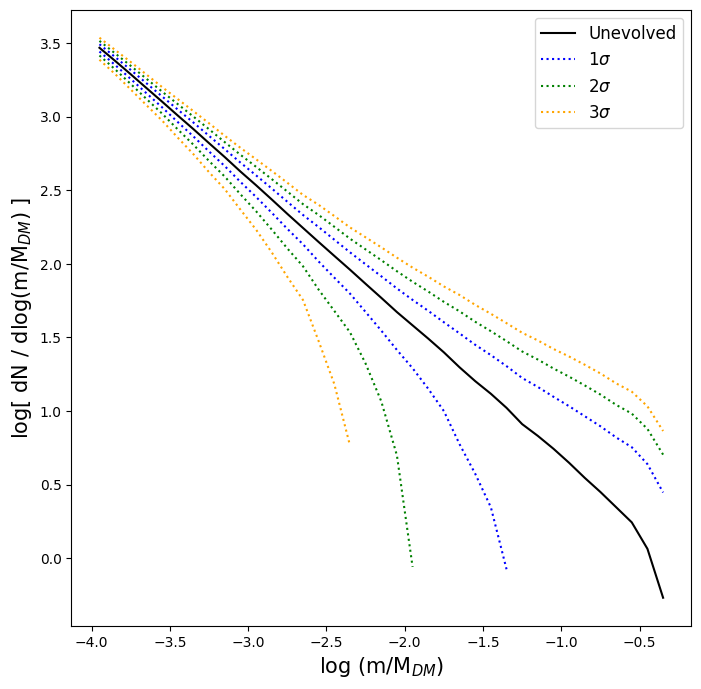

In [9]:

fig, ax = plt.subplots(figsize=(8,8))

ax.plot(acc_bins, np.log10(acc_SHMF_ave/(acc_bins[1]-acc_bins[0])), label="Unevolved", color="black")

ax.plot(acc_bins, np.log10((acc_SHMF_ave+acc_SHMF_std)/(acc_bins[1]-acc_bins[0])), label="$1\sigma$", ls=":", color="blue")
ax.plot(acc_bins, np.log10((acc_SHMF_ave-acc_SHMF_std)/(acc_bins[1]-acc_bins[0])), ls=":", color="blue")
ax.plot(acc_bins, np.log10((acc_SHMF_ave+2*acc_SHMF_std)/(acc_bins[1]-acc_bins[0])), label="2$\sigma$", ls=":", color="green")
ax.plot(acc_bins, np.log10((acc_SHMF_ave-2*acc_SHMF_std)/(acc_bins[1]-acc_bins[0])), ls=":", color="green")
ax.plot(acc_bins, np.log10((acc_SHMF_ave+3*acc_SHMF_std)/(acc_bins[1]-acc_bins[0])), label="3$\sigma$", ls=":", color="orange")
ax.plot(acc_bins, np.log10((acc_SHMF_ave-3*acc_SHMF_std)/(acc_bins[1]-acc_bins[0])), ls=":", color="orange")

plt.xlabel("log (m/M$_{DM}$)", fontsize=15)
plt.ylabel("log[ dN / dlog(m/M$_{DM}$) ]", fontsize=15)
plt.legend(fontsize=12)
plt.savefig("../figures/SHMF_H2H_variance.png")
plt.show()

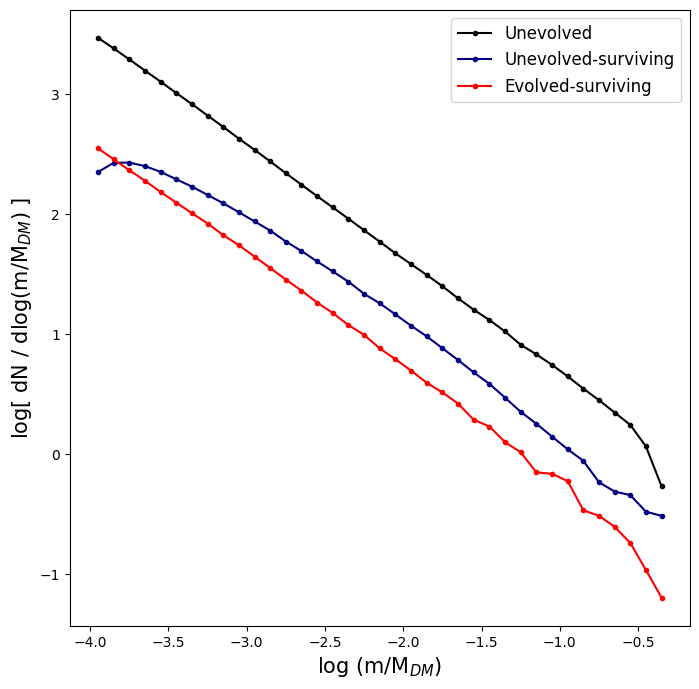

In [10]:
plt.figure(figsize=(8,8))

plt.plot(acc_bins, np.log10(acc_SHMF_ave/(acc_bins[1]-acc_bins[0])), label="Unevolved", marker=".", color="black")
plt.plot(as_bins, np.log10(as_SHMF_ave/(as_bins[1]-as_bins[0])), label="Unevolved-surviving", marker=".", color="navy")
plt.plot(surv_bins, np.log10(surv_SHMF_ave/(surv_bins[1]-surv_bins[0])), label="Evolved-surviving", marker=".", color="red")
#plt.plot(np.log10(psi), np.log10(unevolved(psi)), label="model")

plt.xlabel("log (m/M$_{DM}$)", fontsize=15)
plt.ylabel("log[ dN / dlog(m/M$_{DM}$) ]", fontsize=15)
plt.legend(fontsize=12)
#plt.xlim(-3.9, -0.45)
plt.savefig("../figures/SHMF_flavors.png")
plt.show()